In [1]:
import pandas as pd
import ipywidgets as widgets

from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thomasj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 1. For a given text, get the average sentiment and sentiment by sentence.

/Users/thomasj/anaconda3/envs/anes_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/9217 [00:00<?, ?it/s]

MD sentiment


sentiment summary scores (average)

neg         0.061402
neu         0.867613
pos         0.070983
compound    0.030456
dtype: float64


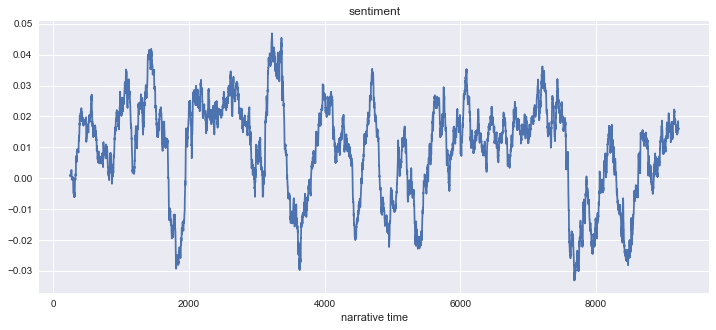

In [7]:
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook
from functools import lru_cache

sia = SentimentIntensityAnalyzer()

lru_cache(None)
def sentiment(sentence):
    return sia.polarity_scores(sentence)

def tokenize_sentiment(txt):

    sents = tokenizer.tokenize(txt)
    sentiments = []
    for s in tqdm_notebook(sents):
        sentiments.append(sentiment(s))
    return sents, sentiments

def sentiment_plot(state):

    if text.value=='Paste contents of .txt here.' or title.value=='Title':
        return('Please enter text for all fields')
    
    sents, sentiments = tokenize_sentiment(text.value)
        
    plt.figure(figsize=(12,5))
    ax =  plt.gca()
    df = pd.DataFrame(sentiments)
    
    print('{} sentiment\n\n'.format(title.value))
    out = df.mean()
    print('sentiment summary scores (average)\n')
    print(out)

    ts = (df['pos']-df['neg']).rolling(250).mean()
    ax = ts.plot(title='sentiment', ax = ax)
    ax.set_xlabel("narrative time")
    return sents, ts
    
title = widgets.Text(description='Title:', value='Title')

text = widgets.Textarea(
            value='Paste contents of .txt here.',
            placeholder='Type something',
            description='String:',
            disabled=False,
            layout={'width': '98%', 'height':'250px'}
        )

button = widgets.Button(
    description='Run',
    disabled=False,
    button_style='',
    tooltip='Run',
    icon='', layout={'pos': 'center'}
)

box_layout = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='flex-start',
                width='50%')

button.on_click(sentiment_plot)
box = widgets.VBox([title, text, button], titles =('Title', 'Text'), layout=box_layout)
box

## 2. For the text entered above, identify plot sections relevant to sentiment graph.

In [15]:
from ipywidgets import interact

@interact(line='', window=(10,100,10))
def print_text(line, window=10):
    try:
        line = int(line)
    except:
        return('Please enter a number.')
    
    sents, sentiments = tokenize_sentiment(text.value)
    df = pd.DataFrame(sentiments)
    ts = (df['pos']-df['neg']).rolling(250).mean()
    
    out = []
    for result in zip(list(df[line-window:line+window].index), sents[line-window:line+window],ts[line-window:line+window]):
        out.append(str((round(result[2],3), result[0], result[1])))
    out = '\n'.join(out)
    print(out)

interactive(children=(Text(value='', description='line'), IntSlider(value=10, description='window', min=10, st…